# MOWNIT LABORATORIUM 3 - Równania nieliniowe
<hr>

## Wstęp

Zadanie ma na celu wprowadzenie w niektóre metody 

## Funkcje do testów:

W zadaniu miały zostac użyte dane 3 funkcje testowe:

$$f_1(x) = cos(x) cosh(x) - 1, x \in [\frac{3}{2}\pi,2\pi]$$
$$f_2(x) = \frac{1}{x} - tan(x), x \in [0,\frac{\pi}{2}]$$
$$f_3(x) = 2^{-x} + e^x + 2cos(x) - 6, x \in [1,3]$$

Problem się pojawia przy $f_2$, ponieważ funkcja nie jest zdefiniowana ani w punkcie 0 ani w punkcie $\frac{\pi}{2}$

Zostały one zaimplementowane w następujący sposób

In [50]:
import math

def f1(x):
  if x > 2*math.pi or x < 3*math.pi/2:
    return "Outside region"
  return (math.cos(x)*math.cosh(x)) - 1

def f2(x):
  if x >= math.pi/2 or x <= 0:
    return "Outside region"
  return ((1/x) - math.tan(x))

def f3(x):
  if x > 3 or x < 1:
    return "Outside region"
  return 2**(-x) + (math.e)**x + 2*math.cos(x) - 6

Następnie można je w przybliżeniu narysować

*warto zauważyć użycie funkcji wyższego rzędu w pythonie*

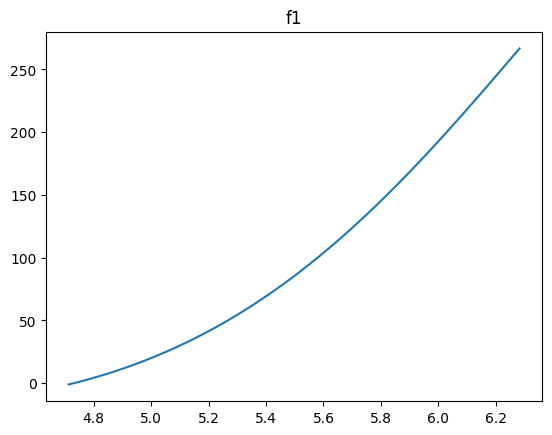

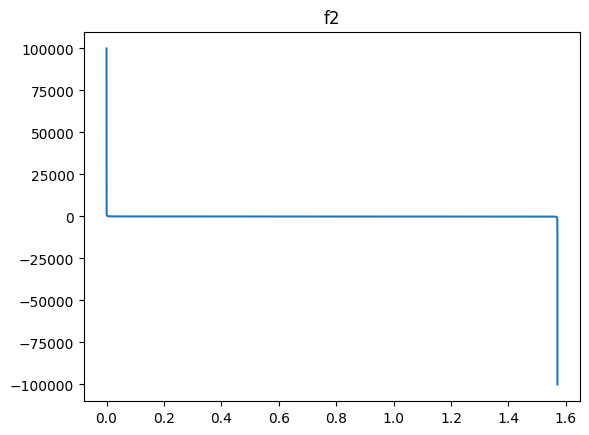

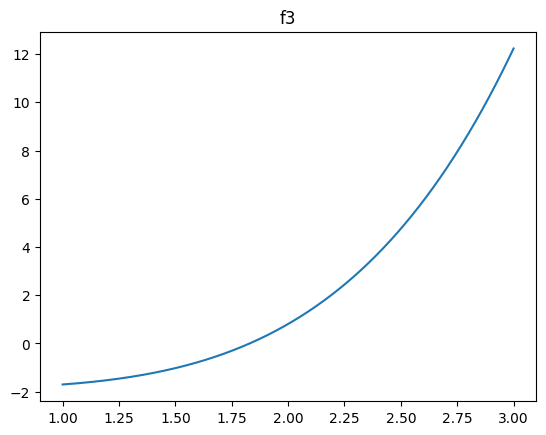

In [51]:
from matplotlib import pyplot as plt
import numpy as np
def drawFunction(function, min_value, max_value):
    plt.figure()
    X = np.linspace(min_value, max_value, 100000)
    Y = np.array([function(x) for x in X])
    plt.plot(X,Y)
    plt.title(function.__name__)

drawFunction(f1,3/2*math.pi, 2*math.pi)
drawFunction(f2,0+1e-5, math.pi/2 -1e-5)
drawFunction(f3,1, 3)

## 1. Metoda Bisekcji

**Metoda bisekcji**$^{[1]}$ (zwana również metodą równego podziału), jest oparta o twierdzenie Darboux $^{[2]}$ :

> Jeżeli funkcja ciągła f ma na końcach przedziału domkniętego wartości różnych znaków, to istnieje co najmniej jeden pierwiastek równania f(x) = 0

Algorytm zasadniczo jest prosty:
Znaleść środek przedziału, sprawdzić znak jego wartości (co może się sprowadzić do sprawdzenia pierwszego bitu, bądź poprzez proste porównanie), a następnie w zależności od wyniku, ustawić odpowiedni skraj na ten nowy punkt.

W związu na niedokładność arytmetyki zmiennoprzecinkowejl, szukany jest wynik przybliżony do danego $\epsilon$

Dodatkowo warto zauważyć, że mimo braku takiego polecenia także do metody bisekcji został dodany limit iteracji, który przyda się głównie do ostatniej części.

<hr>

[1] [https://en.wikipedia.org/wiki/Bisection_method](https://en.wikipedia.org/wiki/Bisection_method)

[2] [https://en.wikipedia.org/wiki/Intermediate_value_theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem)


In [52]:
def bisection(a,b,epsilon,function,iterLimit):
  if function(a) > 0  and function(b) < 0:
    z = -1
  elif function(a) < 0  and function(b) > 0:
    z = 1
  else:
    return None
  mid = a + (b-a)/2  
  for i in range(iterLimit):
    if abs(function(mid)) < epsilon:
        return mid, i
    mid = a + (b-a)/2
    if function(mid) * z < 0:
      a = mid
    else: 
      b = mid

  return mid, iterLimit

print("METODA BISEKCJI")
print("Epsilon = 1e-7")
print(bisection(3*math.pi/2,2*math.pi,       1e-7,f1,int(1e6)))
print(bisection(1e-5,       math.pi/2 - 1e-5,1e-7,f2,int(1e6)))
print(bisection(1,          3,               1e-7,f3,int(1e6)))
print("Epsilon = 1e-13")
print(bisection(3*math.pi/2,2*math.pi,       1e-13,f1,int(1e6)))
print(bisection(1e-5,       math.pi/2 - 1e-5,1e-13,f2,int(1e6)))
print(bisection(1,          3,               1e-13,f3,int(1e6)))
print("Epsilon = 1e-33")
print(bisection(3*math.pi/2,2*math.pi,       1e-33,f1,int(1e6)))
print(bisection(1e-5,       math.pi/2 - 1e-5,1e-33,f2,int(1e6)))
print(bisection(1,          3,               1e-33,f3,int(1e6)))


METODA BISEKCJI
Epsilon = 1e-7
(4.7300407459601495, 29)
(0.8603335845301303, 25)
(1.8293836116790771, 23)
Epsilon = 1e-13
(4.730040744862704, 47)
(0.8603335890193673, 43)
(1.8293836019338414, 41)
Epsilon = 1e-33
(4.730040744862704, 1000000)
(0.8603335890193797, 50)
(1.829383601933849, 52)


Zastosowanie lepszej dokładności (np. $10^{-14}$), powodowało już problemy z obliczaniem wyników. *(odpowiedź na pytanie dlaczego, zostawie już czytelnikowi do własnych przemyśleń)*

## 2. Metoda Netwona

**Metoda Netwona**$^{[1]}$, metoda oparta na własności rekurencyjnej, twierdzącej, ze kolejne przybliżenia szukanego miejsca zerwoego dane są wzorem rekurencyjnym:
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}, k = 1,2,...$$

gdzie za $x_1$ jest dowolne, np. $x_1 = a$

Metada ma też następujące założenia:
1. W szukanym przedziale [a,b] znajduje się dokładnie jedno miejsce zerowe
2. Funkcja ma różne znaki na krańcach
3. Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale

Algorytm wygląda nastepująco:
1. Wyznacz punkt startowy
2. używaj wzoru rekurencyjnego aż do osiągnięcia jednego z warunków zakończenia obliczeń (limit iteracji lub odległośc pomiędzy kolejnymi przybliżeniami wystarzająco mała)

### 2.1 Pochodne funkcji
Jak widać we wzorze rekurencyjnym pojawia się pochodna, nie ma potrzeby liczenia jej rekurencyjnie, przy użyciu kalkulatorów dostepnych online można wywnioskować, że te funkcje są następujące:
$$
f'_1(x) = cos(x)sinh(x) - sin(x)cosh(x)
$$ 
$$
f'_2(x) = -\frac{1}{x^2} - sec^2(x)
$$ 
$$
f'_3(x) = e^x - 2^{-x}ln(2) - 2sin(x)
$$

Dodatkowo przedziały pozostają takie same.


<hr>

[1] [https://en.wikipedia.org/wiki/Newton%27s_method](https://en.wikipedia.org/wiki/Newton%27s_method)

In [62]:
def f1prime(x):
    if x > 2*math.pi or x < 3*math.pi/2:
        return "Outside region"
    return math.cos(x)*math.sinh(x) -math.sin(x)*math.cosh(x)

def f2prime(x):
    if x >= math.pi/2 or x <= 0:
        return "Outside region"
    return -1 / (x ** 2) - 1 / (math.cos(x) ** 2)

def f3prime(x):
    if x > 3 or x < 1:
        return "Outside region"
    return math.e ** x - (2 ** -x) * math.log(2) - 2 * math.sin(x)


def netwonMethod(b,epsilon:float,function,functionPrime,iterLimit:int):
    x = b
    for k in range(iterLimit):
        x_k = x
        x = x - function(x)/functionPrime(x)
        if abs(x_k - x) < epsilon:
            return x, k

print("METODA NETWONA")
print("Epsilon = 1e-7")
print(netwonMethod(2*math.pi,1e-7,f1,f1prime,int(1e6)))
print(netwonMethod(0.001,    1e-7,f2,f2prime,int(1e6)))
print(netwonMethod(2,        1e-7,f3,f3prime,int(1e6)))
print("Epsilon = 1e-13")
print(netwonMethod(2*math.pi,1e-13,f1,f1prime,int(1e6)))
print(netwonMethod(0.001,    1e-13,f2,f2prime,int(1e6)))
print(netwonMethod(2,        1e-13,f3,f3prime,int(1e6)))
print("Epsilon = 1e-30")
print(netwonMethod(2*math.pi,1e-30,f1,f1prime,int(1e6)))
print(netwonMethod(0.001,    1e-30,f2,f2prime,int(1e6)))
print(netwonMethod(2,        1e-30,f3,f3prime,int(1e6)))

print("Difference between first and second method:")
print("f1", abs(netwonMethod(2*math.pi,1e-30,f1,f1prime,int(1e6))[0] - bisection(3*math.pi/2,2*math.pi,1e-13,f1, int(1e6))[0]))
print("f2", abs(netwonMethod(0.001,    1e-30,f2,f2prime,int(1e6))[0] - bisection(1e-5,math.pi/2 - 1e-5,1e-13,f2, int(1e6))[0]))
print("f3", abs(netwonMethod(2,        1e-30,f3,f3prime,int(1e6))[0] - bisection(1,3,                  1e-13,f3, int(1e6))[0]))

METODA NETWONA
Epsilon = 1e-7
(4.730040744862704, 6)
(0.8603335890193798, 12)
(1.829383601933849, 4)
Epsilon = 1e-13
(4.730040744862704, 6)
(0.8603335890193797, 13)
(1.829383601933849, 4)
Epsilon = 1e-30
(4.730040744862704, 7)
(0.8603335890193797, 14)
(1.829383601933849, 5)
Difference between first and second method:
f1 0.0
f2 1.2434497875801753e-14
f3 7.549516567451064e-15


Widać drastyczną poprawe w maksymalnej potencjalnej dokładności oraz tempa zbierzności (testy pokazywały zbierzność rzędu $10^{-300}$, aczkolwiek można wątpić w wiarygodnośc tych wyników ze względu na język)
<hr>

## 3. Metoda siecznych

**Metoda siecznych**$^{[1]}$ polega na przyjęciu, że funkcja ciągła na dostatecznie małym odcinku w przybliżeniu zmienia się w sposób liniowy. Dzięki temu na odcinku [a,b] krzywą y = f(x) możemy zastąpić sieczną. Za przybliżoną wartośc pierwiastka wtedy przyjmujemy punkt przecięcia siecznej z osią OX.

Metode siecznych dla funkcji f(x), na przedziale [a,b] można zapisać następującym wzorem rekurencyjnym:
$$
\left\{
\begin{array}{rcl}
x_0 &=& a \\
x_1 &=& b \\
x_{n+1} &=& \frac{f(x_n) x_{n-1} - f(x_{n-1}) x_n}{f(x_n) - f(x_{n-1})}
\end{array}
\right.
$$


Algorytmem jest prosta implementacja tego wzoru.

<hr>

[1] [https://en.wikipedia.org/wiki/Secant_method](https://en.wikipedia.org/wiki/Secant_method)

In [41]:
def secantMethod(a,b,eps,function,iter_limit):
    x0 = a
    x1 = b
    for i in range(iter_limit):
        temp = (function(x1) * x0 - function(x0) * x1) / (function(x1) - function(x0))
        x0 = x1
        x1 = temp
        if abs(function(x1) - function(x0)) < eps:
            return x1, i
    return x1, i

print("METODA SIECZNYCH")
print("Epsilon = 1e-7")
print(secantMethod(3*math.pi/2,2*math.pi,       1e-7,f1,int(1e6)))
print(secantMethod(1e-6,       math.pi/2 - 1e-5,1e-7,f2,int(1e6)))
print(secantMethod(1,          3,               1e-7,f3,int(1e6)))
print("Epsilon = 1e-13")
print(secantMethod(3*math.pi/2,2*math.pi,       1e-13,f1,int(1e6)))
print(secantMethod(1e-6,       math.pi/2 - 1e-5,1e-13,f2,int(1e6)))
print(secantMethod(1,          3,               1e-13,f3,int(1e6)))
print("Epsilon = 1e-30")
print(secantMethod(3*math.pi/2,2*math.pi,       1e-30,f1,int(1e6)))
print(secantMethod(1e-6,       math.pi/2 - 1e-5,1e-30,f2,int(1e6)))
print(secantMethod(1,          3,               1e-30,f3,int(1e6)))
print("Value difference between first and third method:")
print("f1", abs(secantMethod(3*math.pi/2,2*math.pi,       1e-13,f1,int(1e6))[0] - bisection(3*math.pi/2,2*math.pi,1e-13,f1)[0]))
print("f2", abs(secantMethod(1e-6,       math.pi/2 - 1e-5,1e-13,f2,int(1e6))[0] - bisection(1e-5,math.pi/2 - 1e-5,1e-13,f2)[0]))
print("f3", abs(secantMethod(1,          3,               1e-13,f3,int(1e6))[0] - bisection(1,3,                  1e-13,f3)[0]))
print("Value difference between second and third method:")
print("f1", abs(netwonMethod(2*math.pi,1e-30,f1,f1prime,int(1e6))[0] - secantMethod(3*math.pi/2,2*math.pi,       1e-30,f1,int(1e6))[0]))
print("f2", abs(netwonMethod(0.001,    1e-30,f2,f2prime,int(1e6))[0] - secantMethod(1e-6,       math.pi/2 - 1e-5,1e-30,f2,int(1e6))[0]))
print("f3", abs(netwonMethod(2,        1e-30,f3,f3prime,int(1e6))[0] - secantMethod(1,          3,               1e-30,f3,int(1e6))[0]))


SIECZNYCH
Epsilon = 1e-7
(4.730040744862704, 5)
(0.8603335890193798, 10)
(1.8293836019338487, 9)
Epsilon = 1e-13
(4.730040744862704, 6)
(0.8603335890193798, 11)
(1.8293836019338487, 10)
Epsilon = 1e-30
(4.730040744862704, 6)
(0.8603335890193798, 11)
(1.8293836019338487, 10)
Value difference between first and third method:
f1 0.0
f2 1.2545520178264269e-14
f3 7.327471962526033e-15
Value difference between second and third method:
f1 0.0
f2 1.1102230246251565e-16
f3 2.220446049250313e-16


jak widać różnice (szczególnie między metodą Netwona, a metodą siecznych) są niewielkie.

## Ilość iteracji poszczególnych metod

Na koniec warto jeszcze zbadać ilość iteracji poszczególnych metod dla danego $\epsilon$

Do tego celu przyda nam się funkcja tworząca wykres iteracji w zależności od dokładności i funkcji

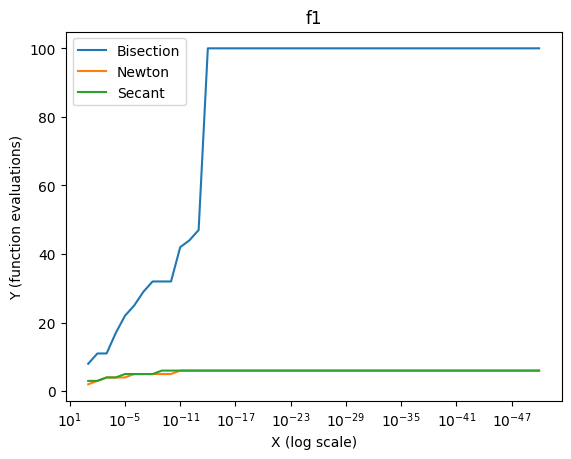

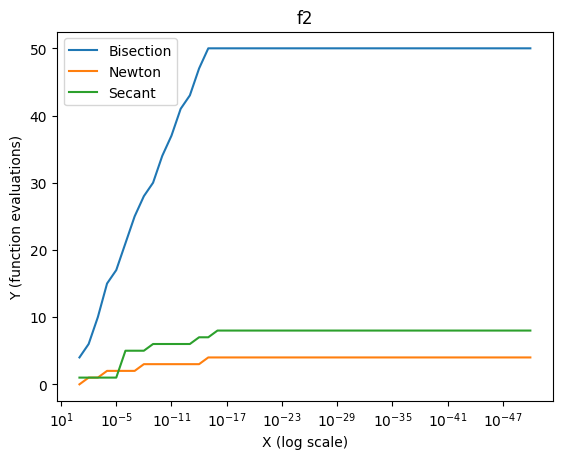

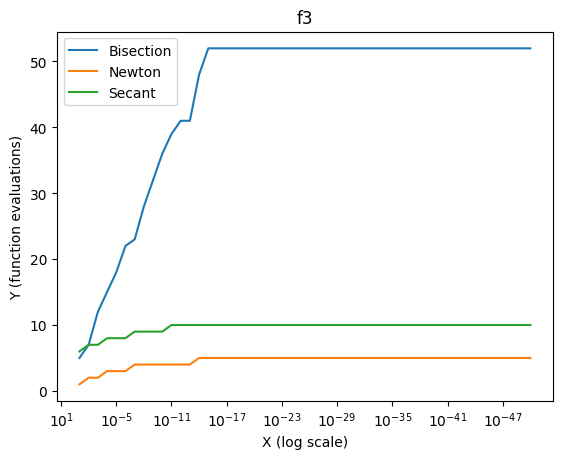

In [61]:
from collections.abc import Callable

def drawIterations(a,b,max_power,function: Callable, functionPrime):
    plt.figure()
    X = [10**i for i in range(-1, max_power - 1, -1)]
    plt.xscale('log')
    plt.gca().invert_xaxis()
    YBisection = [bisection(a,b,X[i],function,               int(1e2))[1] for i in range(len(X))]
    YNetwon = [netwonMethod((a+b)/2,  X[i],function,functionPrime, int(1e2))[1] for i in range(len(X))]
    YSecant = [secantMethod(a,b,X[i],function,               int(1e2))[1] for i in range(len(X))]
    plt.plot(X, YBisection, label='Bisection')
    plt.plot(X, YNetwon, label='Newton')
    plt.plot(X, YSecant, label='Secant')

    plt.xlabel('epsilon')
    plt.ylabel('liczba iteracji')
    plt.legend()
    plt.title(function.__name__)

drawIterations(3*math.pi/2,2*math.pi,       -50, f1, f1prime)
drawIterations(1e-5,       math.pi/2 - 1e-5,-50, f2, f2prime)
drawIterations(1,          3,               -50, f3, f3prime)

Jak widać, metoda bisekcji zdecydowanie odpada w wyścigu iteracyjnym. Natomiast między metodą Netwona a metodą siecznych różnica jest mniejsza, prawdopodobnie spowodowaną miejscem występowania miejsca zerowego (testy dla metody netwona miały swój początek w środku przedziału, co mogło wpłynac na tempo znajdowania).

Dodatkowo warto zauważyć, że ilość iteracji nie zmienia się powyżej danego $\epsilon$ (około $10^{-14}$), co może być dokładnością pythona i wielkością przedziałów

<hr>

Autor: Ernest Szlamczyk